<a href="https://colab.research.google.com/github/Manmeet13121996/jan2019/blob/master/PCA_and_ML_of_pizza_dataset_with_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

### **Install Pycaret**

In [ ]:
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.utils import version
version()

'2.3.6'

### **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Dataset


The Columns(variables) in the data set are:

* mois -- Amount of water per 100 grams in the sample

* prot -- Amount of protein per 100 grams in the sample

* fat -- Amount of fat per 100 grams in the sample

* ash -- Amount of ash per 100 grams in the sample

* sodium -- Amount of sodium per 100 grams in the sample

* carb -- Amount of carbohydrates per 100 grams in the sample

* cal -- Amount of calories per 100 grams in the sample

* brand -- Pizza brand (class label

Source of data: https://data.world/sdhilip/pizza-datasets

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Manmeet13121996/INSE-6220/main/Pizza_dataset_final.csv')
df.head(25)

mois   prot    fat   ash  sodium  carb   cal brand
0   27.82  21.43  44.87  5.11    1.77  0.77  4.93     A
1   28.49  21.26  43.89  5.34    1.79  1.02  4.84     A
2   28.35  19.99  45.78  5.08    1.63  0.80  4.95     A
3   30.55  20.15  43.13  4.79    1.61  1.38  4.74     A
4   30.49  21.28  41.65  4.82    1.64  1.76  4.67     A
5   31.14  20.23  42.31  4.92    1.65  1.40  4.67     A
6   31.21  20.97  41.34  4.71    1.58  1.77  4.63     A
7   28.76  21.41  41.60  5.28    1.75  2.95  4.72     A
8   28.22  20.48  45.10  5.02    1.71  1.18  4.93     A
9   27.72  21.19  45.29  5.16    1.66  0.64  4.95     A
10  27.35  21.20  45.59  4.94    1.65  0.92  4.98     A
11  26.98  21.20  45.03  5.15    1.67  1.64  4.97     A
12  28.70  20.00  45.12  4.93    1.56  1.25  4.91     A
13  30.91  19.65  42.45  4.81    1.65  2.81  4.72     A
14  30.91  20.77  42.03  4.90    1.61  1.39  4.67     A
15  30.83  17.88  44.33  5.26    1.76  1.70  4.77     A
16  32.73  20.06  39.74  5.24    1.69  2.23  4.47     A
17  34.58  17.53  40.87  5.05    1.61  1.97  4.46     A
18  31.80  20.35  40.44  5.43    1.61  1.98  4.53     A
19  31.02  19.05  42.29  5.27    1.71  2.37  4.66     A
20  27.02  19.56  47.20  4.95    1.65  1.27  5.08     A
21  27.78  20.01  45.59  4.97    1.70  1.65  4.97     A
22  30.88  20.58  42.26  4.96    1.63  1.32  4.68     A
23  32.20  19.25  43.42  4.62    1.50  0.51  4.70     A
24  33.19  18.05  41.88  5.22    1.70  1.66  4.56     A

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mois    300 non-null    float64
 1   prot    300 non-null    float64
 2   fat     300 non-null    float64
 3   ash     300 non-null    float64
 4   sodium  300 non-null    float64
 5   carb    300 non-null    float64
 6   cal     300 non-null    float64
 7   brand   300 non-null    object 
dtypes: float64(7), object(1)
memory usage: 18.9+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  5


In [ ]:
df = df.drop_duplicates()
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## Exploratory Data Analysis

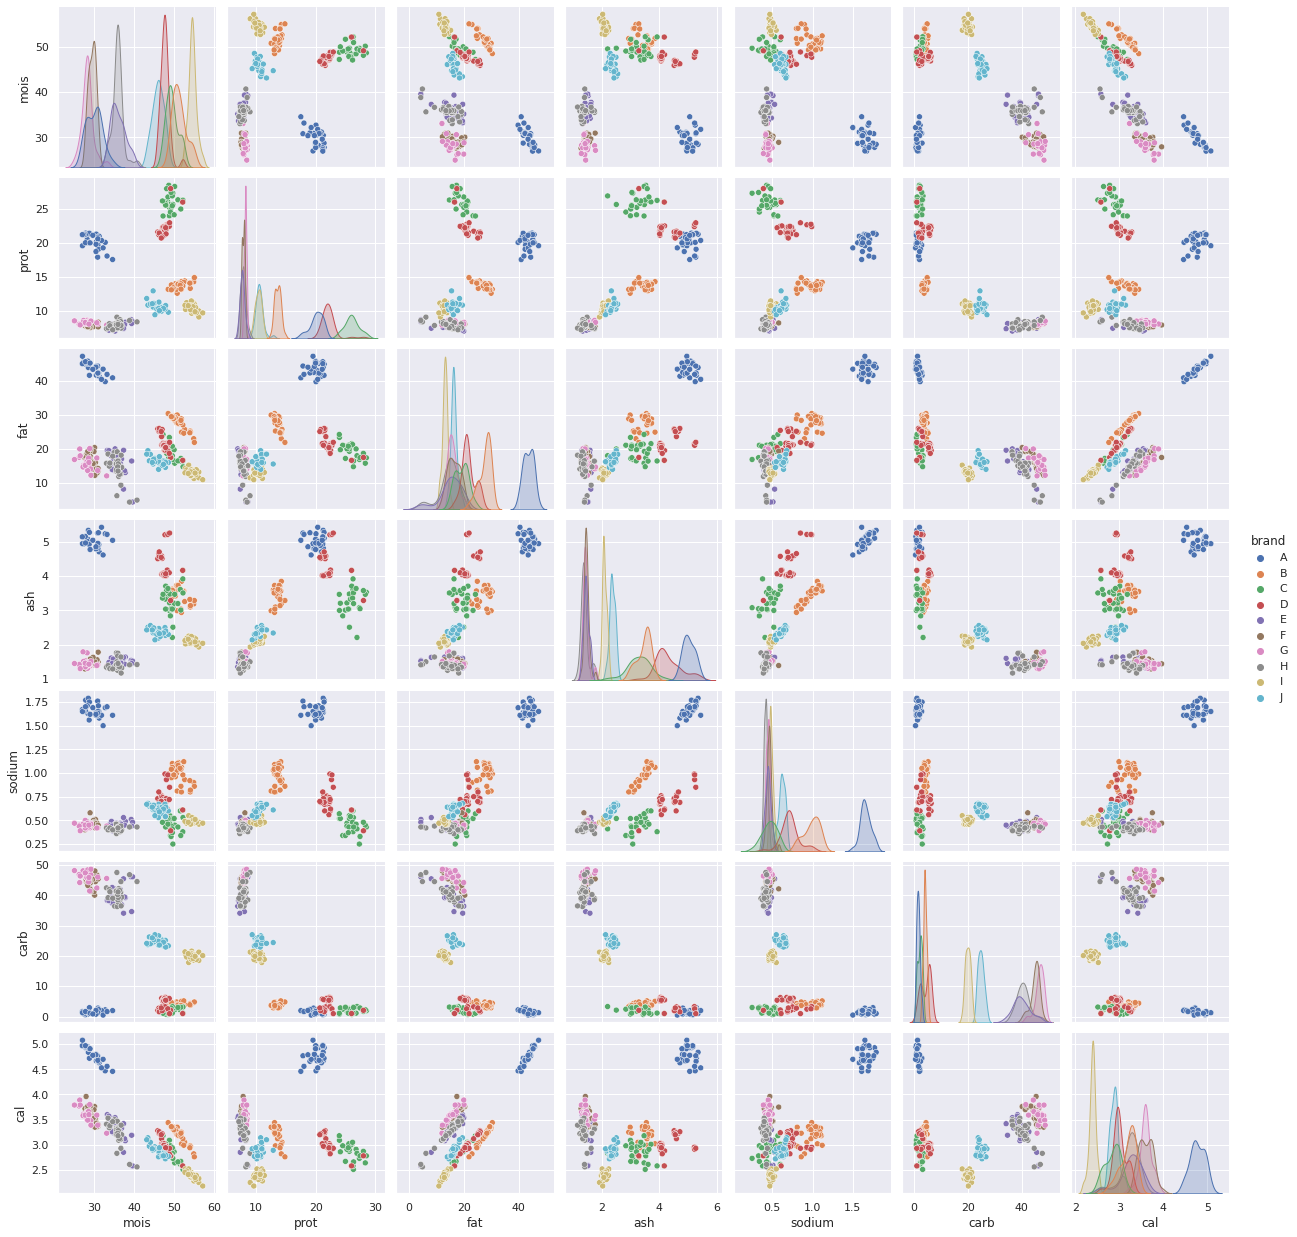

In [ ]:
sns.pairplot(df, hue='brand')
plt.show()

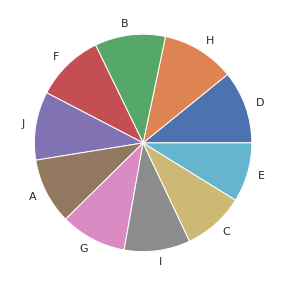

In [ ]:
y =df['brand']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

DATA MATRIX

In [ ]:
X = df.drop(columns=['brand'])
X.head(10)

mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9  27.72  21.19  45.29  5.16    1.66  0.64  4.95

In [ ]:
X.describe().transpose()

count       mean        std    min     25%    50%     75%    max
mois    295.0  40.900407   9.611041  25.00  30.865  43.45  49.215  57.22
prot    295.0  13.451661   6.458632   6.98   8.065  10.46  20.105  28.48
fat     295.0  20.309322   9.025847   4.38  14.795  17.20  21.540  47.20
ash     295.0   2.646576   1.275341   1.17   1.450   2.24   3.600   5.43
sodium  295.0   0.672237   0.372777   0.25   0.450   0.49   0.715   1.79
carb    295.0  22.696271  18.113844   0.51   3.300  21.62  41.400  48.64
cal     295.0   3.274576   0.623820   2.18   2.910   3.22   3.520   5.08

Standardize the Data

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

mois      prot       fat       ash    sodium      carb       cal
0 -1.363290  1.237398  2.725773  1.934862  2.949825 -1.212527  2.658197
1 -1.293460  1.211032  2.617012  2.115513  3.003567 -1.198702  2.513680
2 -1.308051  1.014061  2.826766  1.911299  2.573627 -1.210868  2.690312
3 -1.078759  1.038876  2.532666  1.683523  2.519885 -1.178794  2.353105
4 -1.085012  1.214133  2.368414  1.707086  2.600499 -1.157780  2.240702
5 -1.017267  1.051284  2.441661  1.785629  2.627370 -1.177688  2.240702
6 -1.009971  1.166054  2.334010  1.620688  2.439271 -1.157227  2.176472
7 -1.265319  1.234296  2.362865  2.068386  2.896082 -1.091973  2.320990
8 -1.321600  1.090058  2.751299  1.864173  2.788597 -1.189854  2.658197
9 -1.373712  1.200175  2.772385  1.974134  2.654241 -1.219716  2.690312

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
mois    295.0 -1.445172e-16  1.001699 -1.657201 -1.045928  0.265728  0.866578   
prot    295.0  2.408619e-16  1.001699 -1.003720 -0.835442 -0.463991  1.031897   
fat     295.0  4.817239e-17  1.001699 -1.767855 -0.611986 -0.345076  0.136582   
ash     295.0 -1.926896e-16  1.001699 -1.159756 -0.939834 -0.319340  0.748854   
sodium  295.0  0.000000e+00  1.001699 -1.134604 -0.597179 -0.489694  0.114909   
carb    295.0  1.445172e-16  1.001699 -1.226905 -1.072618 -0.059518  1.034320   
cal     295.0  1.926896e-16  1.001699 -1.757616 -0.585418 -0.087636  0.394089   

             max  
mois    1.700890  
prot    2.330815  
fat     2.984359  
ash     2.186202  
sodium  3.003567  
carb    1.434693  
cal     2.899060

Observations and variables

In [ ]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

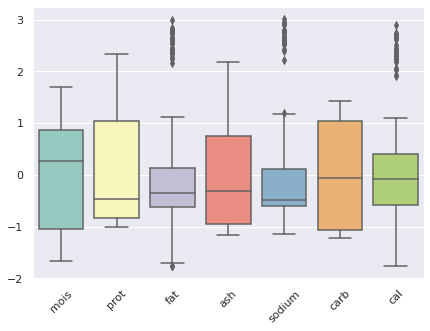

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

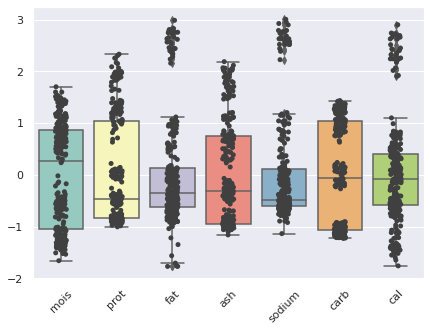

In [ ]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set3")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

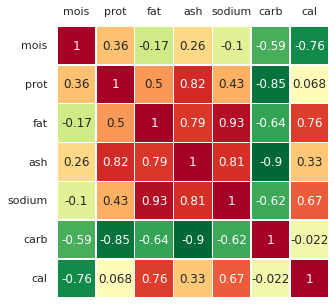

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# To fix scale 
#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

**Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

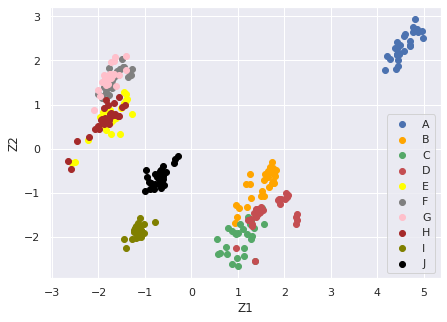

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

idxA = np.where(y == "A")
idxB = np.where(y == "B")
idxC = np.where(y == "C")
idxD = np.where(y == "D")
idxE = np.where(y == "E")
idxF = np.where(y == "F")
idxG = np.where(y == "G")
idxH = np.where(y == "H")
idxI = np.where(y == "I")
idxJ = np.where(y == "J")
plt. figure()
plt.scatter(Z[idxA,0], Z[idxA,1], c='b', label='A')
plt.scatter(Z[idxB,0], Z[idxB,1], c='orange', label='B')
plt.scatter(Z[idxC,0], Z[idxC,1], c='g', label='C')
plt.scatter(Z[idxD,0], Z[idxD,1], c='r', label='D')
plt.scatter(Z[idxE,0], Z[idxE,1], c='yellow', label='E')
plt.scatter(Z[idxF,0], Z[idxF,1], c='gray', label='F')
plt.scatter(Z[idxG,0], Z[idxG,1], c='pink', label='G')
plt.scatter(Z[idxH,0], Z[idxH,1], c='brown', label='H')
plt.scatter(Z[idxI,0], Z[idxI,1], c='olive', label='I')
plt.scatter(Z[idxJ,0], Z[idxJ,1], c='black', label='J')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

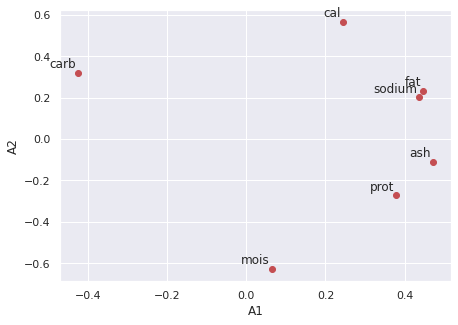

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

invalid value encountered in sqrt


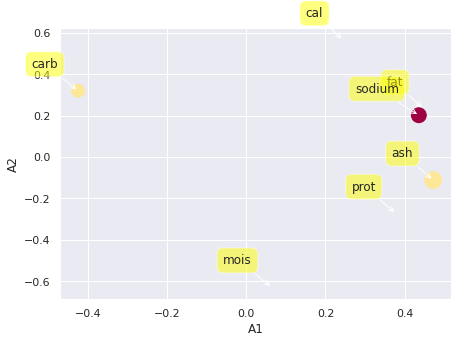

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

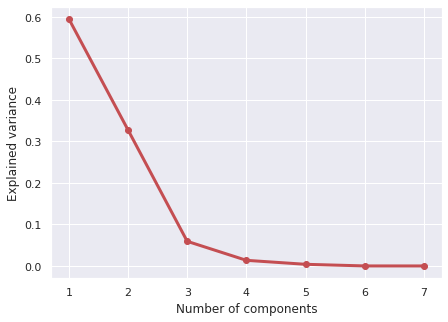

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

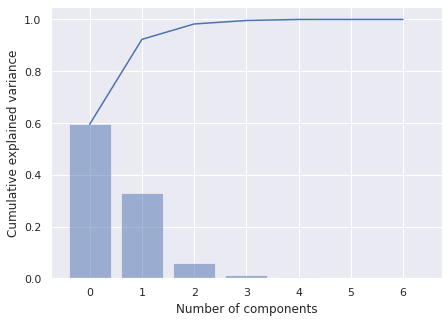

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

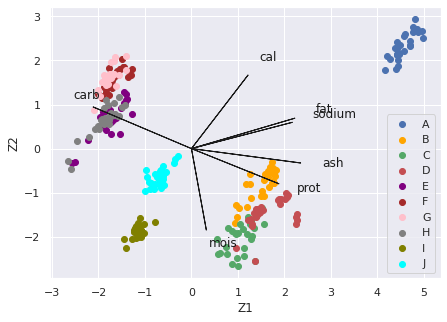

In [ ]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idxA,0], Z[idxA,1], c='b', label='A')
plt.scatter(Z[idxB,0], Z[idxB,1], c='orange', label='B')
plt.scatter(Z[idxC,0], Z[idxC,1], c='g', label='C')
plt.scatter(Z[idxD,0], Z[idxD,1], c='r', label='D')
plt.scatter(Z[idxE,0], Z[idxE,1], c='purple', label='E')
plt.scatter(Z[idxF,0], Z[idxF,1], c='brown', label='F')
plt.scatter(Z[idxG,0], Z[idxG,1], c='pink', label='G')
plt.scatter(Z[idxH,0], Z[idxH,1], c='gray', label='H')
plt.scatter(Z[idxI,0], Z[idxI,1], c='olive', label='I')
plt.scatter(Z[idxJ,0], Z[idxJ,1], c='cyan', label='J')
plt.legend(loc='lower right')

**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)
     

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    4.962938  2.658849 -0.034297
1    4.976317  2.510049 -0.091811
2    4.759264  2.653620 -0.071064
3    4.424868  2.267595 -0.116226
4    4.427142  2.142235  0.002831
..        ...       ...       ...
290 -0.664188 -0.582318 -0.554818
291 -0.385828 -0.332475 -0.411718
292 -0.555137 -0.525751 -0.430142
293 -0.360223 -0.240449 -0.285071
294 -0.665488 -0.510441 -0.374404

[295 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [295] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [295] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3be8bcdbe0>)

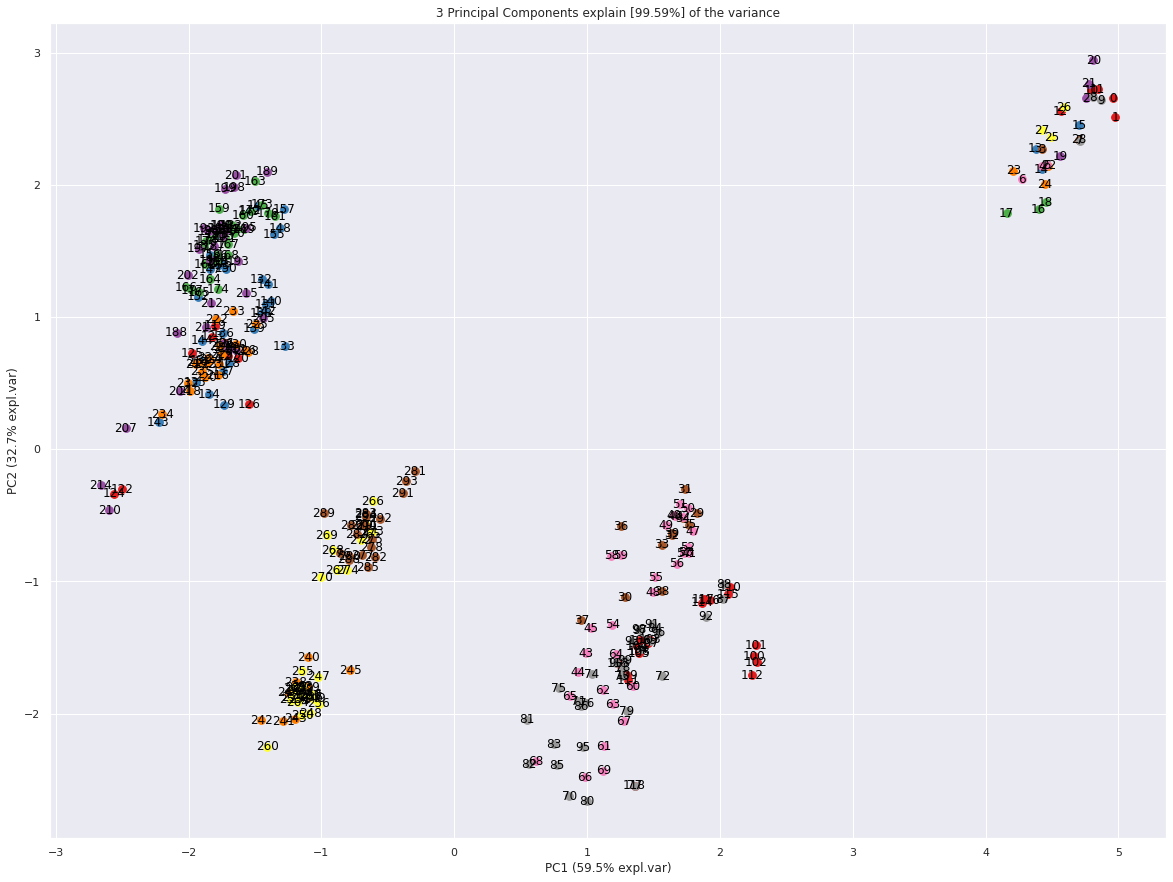

In [ ]:
model.scatter(label=True, legend=False)

Eigenvectors

In [ ]:
A = out['loadings'].T

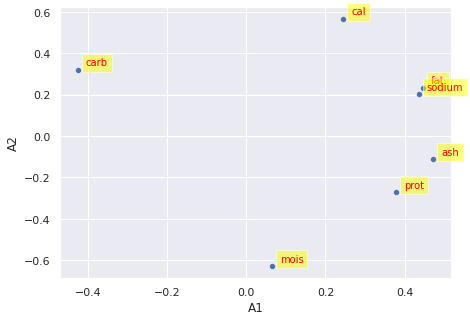

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

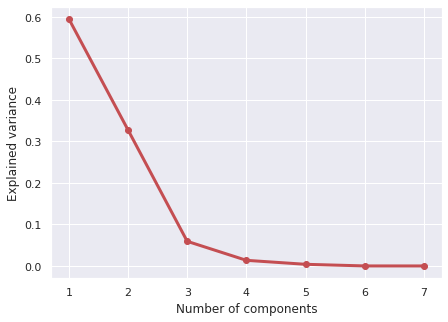

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance Plot

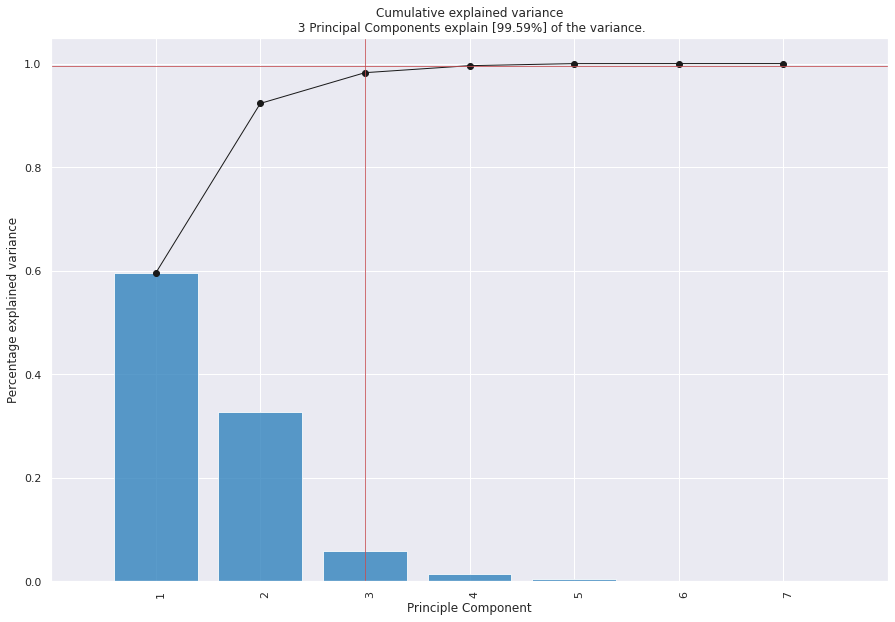

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [295] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [295] unique colors! Available unique colors: [9].


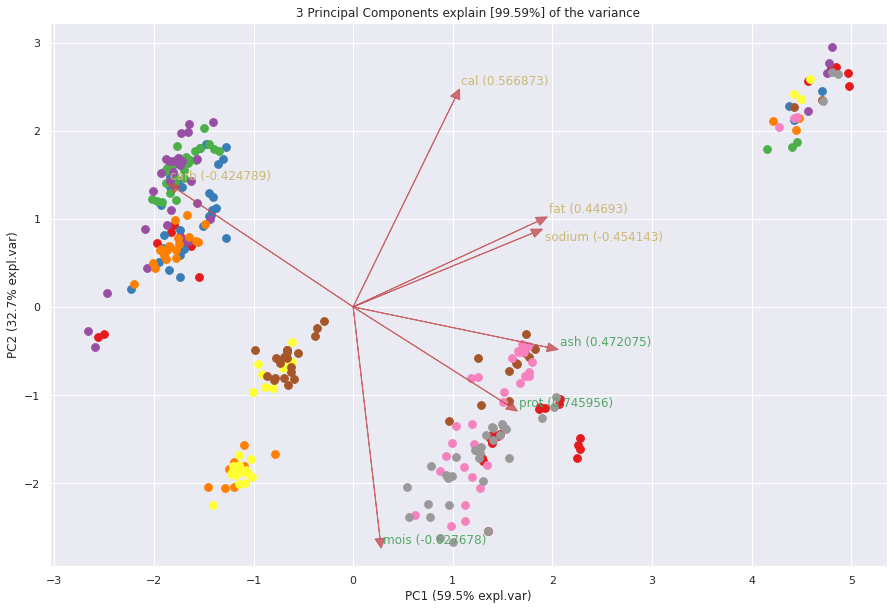

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3be8078700>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [295] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [295] unique colors! Available unique colors: [9].


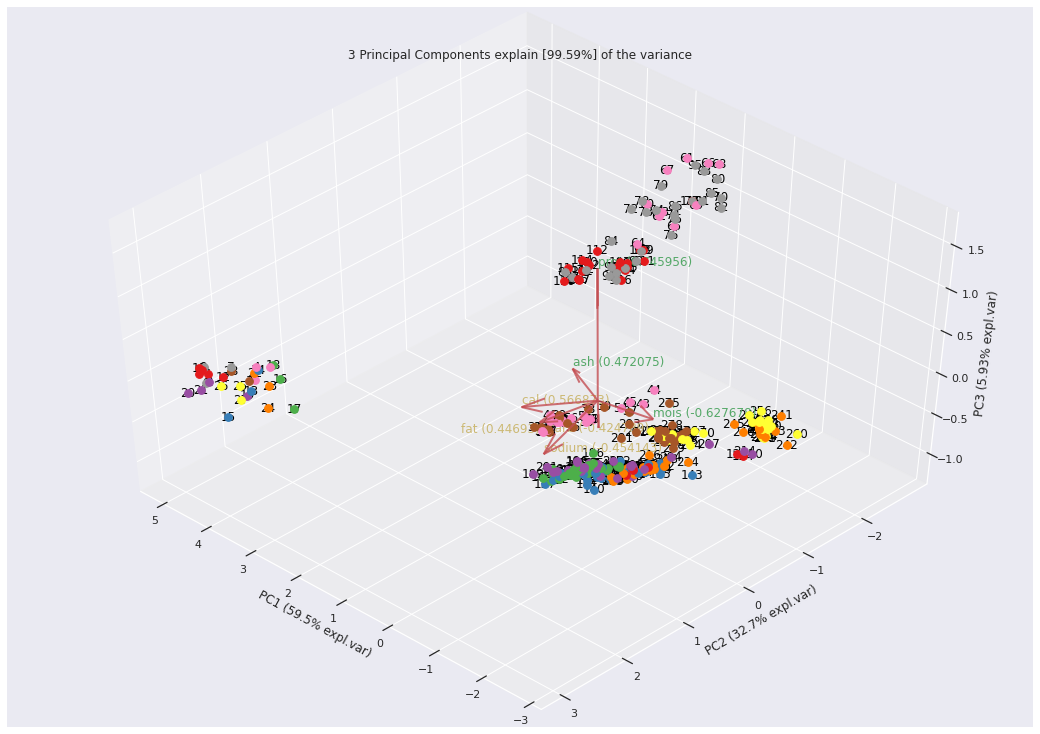

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f3be8f6b340>)

In [ ]:
model.biplot3d(legend=False)

**Classification**

Using PyCaret

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (266, 8)
Unseen Data For Predictions: (29, 8)


## Setting up the Environment in PyCaret

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='brand', train_size=0.7, session_id=123)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                               brand  
2                                          Multiclass  
3   A: 0, B: 1, C: 2, D: 3, E: 4, F: 5, G: 6, H: 7...  
4                                            (266, 8)  
5                                               False  
6                                                   7  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                           (186, 7)  
12                                            (80, 7)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='brand',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:


*   session_id : A pseduo-random number distributed as a seed in all 
functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

*   Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

*   Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

*   Original Data : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

*   Missing Values : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

*   Numeric Features : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

*   Categorical Features : The number of features inferred as categorical. In this dataset, there are no categorical features.

*   Transformed Train Set : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

*   Transformed Test Set : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing All Models**

In [ ]:
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9143  0.9866  0.9100  0.9199   
gbc          Gradient Boosting Classifier    0.9038  0.9818  0.9000  0.9111   
rf               Random Forest Classifier    0.9032  0.9938  0.9067  0.9261   
lr                    Logistic Regression    0.8921  0.9930  0.8900  0.9009   
nb                            Naive Bayes    0.8877  0.9917  0.8850  0.8987   
lightgbm  Light Gradient Boosting Machine    0.8871  0.9958  0.8883  0.9001   
dt               Decision Tree Classifier    0.8816  0.9339  0.8867  0.9100   
knn                K Neighbors Classifier    0.8605  0.9802  0.8517  0.8692   
lda          Linear Discriminant Analysis    0.8602  0.9882  0.8567  0.8598   
qda       Quadratic Discriminant Analysis    0.7257  0.9774  0.7350  0.6853   
svm                   SVM - Linear Kernel    0.6363  0.0000  0.6133  0.5143   
ridge                    Ridge Classifier    0.6076  0.0000  0.5850  0.5027   
ada                  Ada Boost Classifier    0.4146  0.8266  0.3950  0.2838   
dummy                    Dummy Classifier    0.1076  0.5000  0.1000  0.0116   

              F1   Kappa     MCC  TT (Sec)  
et        0.9023  0.9042  0.9092     0.171  
gbc       0.8925  0.8925  0.8972     0.766  
rf        0.8958  0.8919  0.8970     0.206  
lr        0.8800  0.8794  0.8849     0.676  
nb        0.8772  0.8746  0.8793     0.020  
lightgbm  0.8740  0.8740  0.8798     0.180  
dt        0.8742  0.8677  0.8736     0.016  
knn       0.8454  0.8442  0.8505     0.021  
lda       0.8437  0.8439  0.8507     0.020  
qda       0.6749  0.6942  0.7112     0.020  
svm       0.5451  0.5924  0.6221     0.022  
ridge     0.5329  0.5609  0.5862     0.013  
ada       0.3123  0.3390  0.4092     0.098  
dummy     0.0209  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

## **Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models as they are the top perfroming:

*   Extra Trees Classifier ('et')
*   Gradient Boosting Classifier ('gbc')
*   Random Forest Classifier ('rf')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Extra Tree Classifier**

In [ ]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  1.0000  0.9167  0.9298  0.8912  0.8824  0.8879
1       0.8421  0.9616  0.8000  0.7544  0.7860  0.8235  0.8366
2       0.8421  0.9598  0.8000  0.8421  0.8140  0.8235  0.8313
3       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8947  0.9969  0.9000  0.9298  0.8877  0.8827  0.8882
6       0.8889  0.9618  0.8500  0.8704  0.8630  0.8746  0.8808
7       0.8889  0.9896  0.9167  0.9352  0.8889  0.8759  0.8819
8       0.9444  0.9963  0.9667  0.9722  0.9481  0.9379  0.9412
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9143  0.9866  0.9100  0.9199  0.9023  0.9042  0.9092
SD      0.0540  0.0170  0.0700  0.0734  0.0680  0.0604  0.0570

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Extra Tree Model**

In [ ]:
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  1.0000  0.9500  0.9649  0.9439  0.9410  0.9439
1       0.8947  0.9880  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8421  0.9969  0.8000  0.8421  0.8140  0.8235  0.8313
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8947  0.9938  0.9000  0.9298  0.8877  0.8827  0.8882
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9444  0.9933  0.9500  0.9722  0.9444  0.9377  0.9410
8       0.9444  0.9963  0.9667  0.9722  0.9481  0.9379  0.9412
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9468  0.9968  0.9417  0.9558  0.9408  0.9405  0.9434
SD      0.0526  0.0039  0.0668  0.0531  0.0616  0.0588  0.0561

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_et'. 
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Gradient Boosting Classifier(gbc) Model**



In [ ]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6842  0.9390  0.7167  0.6930  0.6632  0.6471  0.6594
1       0.9474  0.9677  0.9000  0.9123  0.9263  0.9412  0.9441
2       0.8421  0.9663  0.8000  0.8421  0.8140  0.8235  0.8313
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9474  1.0000  0.9500  0.9737  0.9474  0.9415  0.9444
5       0.8947  0.9876  0.9000  0.9123  0.8912  0.8827  0.8855
6       0.8889  0.9965  0.8500  0.8704  0.8630  0.8746  0.8808
7       0.9444  0.9863  0.9500  0.9722  0.9444  0.9377  0.9410
8       0.8889  0.9741  0.9333  0.9352  0.8759  0.8763  0.8854
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9038  0.9818  0.9000  0.9111  0.8925  0.8925  0.8972
SD      0.0875  0.0190  0.0850  0.0883  0.0948  0.0978  0.0943

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Tune gbc Model

In [ ]:
tuned_gbc = tune_model(gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  1.0000  0.9500  0.9649  0.9439  0.9410  0.9439
1       0.9474  0.9412  0.9000  0.9123  0.9263  0.9412  0.9441
2       0.8421  0.9876  0.8000  0.8421  0.8140  0.8235  0.8313
3       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
4       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
5       0.8947  0.9876  0.9000  0.9298  0.8877  0.8827  0.8882
6       0.8333  1.0000  0.8167  0.8519  0.8148  0.8125  0.8240
7       0.8889  0.9965  0.9167  0.9352  0.8889  0.8759  0.8819
8       0.8333  0.9891  0.8833  0.9259  0.8296  0.8151  0.8293
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9082  0.9902  0.9067  0.9292  0.8993  0.8975  0.9031
SD      0.0554  0.0171  0.0588  0.0477  0.0603  0.0619  0.0580

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


Evaluate gbc Model

In [ ]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Classifier	(rbc) Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9938  0.8500  0.8596  0.8386  0.8230  0.8255
1       0.8947  0.9587  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8421  1.0000  0.8000  0.8421  0.8140  0.8235  0.8313
3       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8947  0.9892  0.9000  0.9298  0.8877  0.8827  0.8882
6       0.8889  1.0000  0.9167  0.9259  0.8852  0.8754  0.8815
7       0.8889  1.0000  0.9167  0.9352  0.8889  0.8759  0.8819
8       0.8333  0.9963  0.8833  0.9259  0.8296  0.8151  0.8293
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9032  0.9938  0.9067  0.9261  0.8958  0.8919  0.8970
SD      0.0580  0.0122  0.0616  0.0514  0.0626  0.0647  0.0617

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  1.0000  0.9000  0.9298  0.8877  0.8820  0.8875
1       0.8947  0.9849  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8421  0.9969  0.8000  0.8421  0.8140  0.8235  0.8313
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8947  0.9938  0.9000  0.9298  0.8877  0.8827  0.8882
6       0.8889  1.0000  0.9167  0.9259  0.8852  0.8754  0.8815
7       0.8889  0.9965  0.9167  0.9352  0.8889  0.8759  0.8819
8       0.8333  0.9854  0.8833  0.9259  0.8296  0.8151  0.8293
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9137  0.9958  0.9167  0.9366  0.9063  0.9037  0.9088
SD      0.0602  0.0057  0.0637  0.0498  0.0659  0.0671  0.0633

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9474  1.0000  0.9500  0.9649  0.9439  0.9410  0.9439
1       0.8947  0.9880  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8421  0.9969  0.8000  0.8421  0.8140  0.8235  0.8313
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8947  0.9938  0.9000  0.9298  0.8877  0.8827  0.8882
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9444  0.9933  0.9500  0.9722  0.9444  0.9377  0.9410
8       0.9444  0.9963  0.9667  0.9722  0.9481  0.9379  0.9412
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9468  0.9968  0.9417  0.9558  0.9408  0.9405  0.9434
SD      0.0526  0.0039  0.0668  0.0531  0.0616  0.0588  0.0561

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='brand', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                 123  
1                                               brand  
2                                          Multiclass  
3   A: 0, B: 1, C: 2, D: 3, E: 4, F: 5, G: 6, H: 7...  
4                                            (266, 8)  
5                                               False  
6                                                   7  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                           (186, 3)  
12                                            (80, 3)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='brand',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='brand')),
                ('fix_perfect', Remove_100(target='brand')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9026  0.9871  0.9067  0.9271   
nb                            Naive Bayes    0.8921  0.9894  0.8933  0.9174   
dt               Decision Tree Classifier    0.8918  0.9396  0.9017  0.9077   
knn                K Neighbors Classifier    0.8874  0.9653  0.8850  0.9040   
gbc          Gradient Boosting Classifier    0.8816  0.9811  0.8867  0.8950   
lightgbm  Light Gradient Boosting Machine    0.8757  0.9886  0.8867  0.9081   
lda          Linear Discriminant Analysis    0.8711  0.9920  0.8750  0.9001   
et                 Extra Trees Classifier    0.8702  0.9832  0.8783  0.8822   
qda       Quadratic Discriminant Analysis    0.8602  0.9906  0.8617  0.8827   
lr                    Logistic Regression    0.7953  0.9791  0.8017  0.7738   
svm                   SVM - Linear Kernel    0.7260  0.0000  0.7183  0.6792   
ridge                    Ridge Classifier    0.5693  0.0000  0.5500  0.4135   
ada                  Ada Boost Classifier    0.5330  0.9012  0.5100  0.3951   
dummy                    Dummy Classifier    0.1076  0.5000  0.1000  0.0116   

              F1   Kappa     MCC  TT (Sec)  
rf        0.8945  0.8912  0.8965     0.213  
nb        0.8860  0.8795  0.8849     0.022  
dt        0.8828  0.8790  0.8838     0.017  
knn       0.8768  0.8744  0.8797     0.027  
gbc       0.8692  0.8678  0.8746     0.670  
lightgbm  0.8706  0.8611  0.8667     0.109  
lda       0.8611  0.8561  0.8633     0.016  
et        0.8508  0.8551  0.8646     0.175  
qda       0.8509  0.8441  0.8500     0.019  
lr        0.7665  0.7715  0.7825     0.045  
svm       0.6785  0.6948  0.7134     0.022  
ridge     0.4539  0.5178  0.5566     0.013  
ada       0.4267  0.4754  0.5236     0.095  
dummy     0.0209  0.0000  0.0000     0.016

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.9985  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8947  0.9290  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8947  0.9613  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8947  0.9427  0.9000  0.9474  0.8947  0.8827  0.8910
4       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
5       0.8947  0.9381  0.9000  0.9474  0.8947  0.8827  0.8910
6       0.9444  1.0000  0.9667  0.9630  0.9444  0.9377  0.9410
7       0.9444  0.9856  0.9667  0.9630  0.9444  0.9377  0.9410
8       0.8889  0.9339  0.9167  0.9074  0.8889  0.8754  0.8785
9       0.8889  0.9411  0.8500  0.8796  0.8667  0.8750  0.8811
Mean    0.9193  0.9630  0.9200  0.9380  0.9136  0.9098  0.9144
SD      0.0358  0.0283  0.0476  0.0375  0.0405  0.0400  0.0381

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8947  0.9493  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8947  0.9567  0.9000  0.9298  0.8877  0.8827  0.8882
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8947  0.9969  0.9000  0.9386  0.8912  0.8831  0.8885
5       0.8421  0.9845  0.8500  0.8772  0.8351  0.8241  0.8292
6       0.7778  1.0000  0.7833  0.8148  0.7426  0.7509  0.7669
7       0.9444  0.9928  0.9667  0.9630  0.9444  0.9377  0.9410
8       0.8889  0.9926  0.9167  0.9352  0.8889  0.8759  0.8819
9       0.8889  0.9983  0.9000  0.9352  0.8852  0.8754  0.8815
Mean    0.9026  0.9871  0.9067  0.9271  0.8945  0.8912  0.8965
SD      0.0637  0.0177  0.0655  0.0546  0.0722  0.0712  0.0674

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.9985  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8947  0.9290  0.8500  0.8772  0.8702  0.8824  0.8879
2       0.8947  0.9613  0.9000  0.9298  0.8877  0.8827  0.8882
3       0.8947  0.9427  0.9000  0.9474  0.8947  0.8827  0.8910
4       0.9474  1.0000  0.9500  0.9649  0.9439  0.9414  0.9443
5       0.8947  0.9381  0.9000  0.9474  0.8947  0.8827  0.8910
6       0.9444  1.0000  0.9667  0.9630  0.9444  0.9377  0.9410
7       0.9444  0.9856  0.9667  0.9630  0.9444  0.9377  0.9410
8       0.8889  0.9339  0.9167  0.9074  0.8889  0.8754  0.8785
9       0.8889  0.9411  0.8500  0.8796  0.8667  0.8750  0.8811
Mean    0.9193  0.9630  0.9200  0.9380  0.9136  0.9098  0.9144
SD      0.0358  0.0283  0.0476  0.0375  0.0405  0.0400  0.0381

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


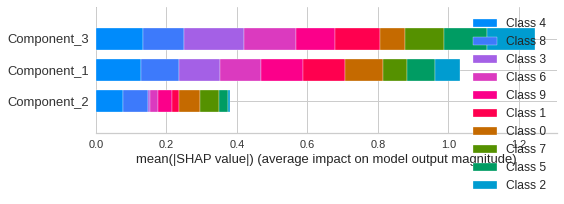

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

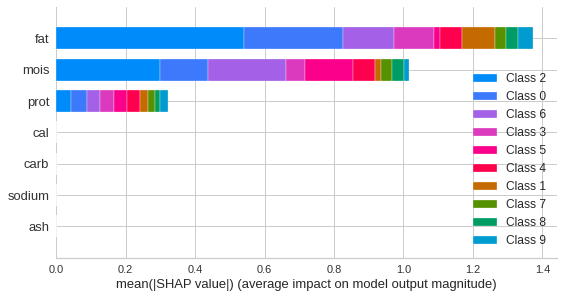

In [ ]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('brand', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation 

(i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
